In [9]:
import pandas as pd

In [2]:
df = pd.read_csv("traffic.csv")

In [3]:
proto_counts = df['Protocol'].value_counts()
print(proto_counts)

UDP     3598
SIP      596
HTTP     110
Name: Protocol, dtype: int64


In [4]:
df

,Packet_Num,Time,Source,Destination,Protocol,Length
0,147,33.320161,192.168.20.2,192.168.3.101,UDP,64
1,178,33.952039,192.168.20.2,192.168.3.101,UDP,64
2,186,34.208800,192.168.3.101,192.168.20.2,UDP,112
3,187,34.211274,192.168.3.101,192.168.20.2,UDP,300
4,188,34.213375,192.168.3.101,192.168.20.2,UDP,1150
...,...,...,...,...,...,...
4299,5851,50.932083,192.168.20.2,192.168.3.101,UDP,92
4300,5852,50.933567,192.168.3.101,192.168.20.2,UDP,1180
4301,5855,50.979146,192.168.3.101,192.168.20.2,UDP,1159
4302,5856,50.979177,192.168.3.101,192.168.20.2,UDP,1159


In [5]:
new_df = pd.DataFrame(columns=['Time','UE','App'])

for i, row in df.iterrows():
    
    
    if '192.168.3.101' in row['Source'] or '192.168.3.101' in row['Destination']:
        app = 'web-rtc'
    
    if '192.168.3.102' in row['Source'] or '192.168.3.102' in row['Destination']:
        app = 'sipp'
        
    if '192.168.3.103' in row['Source'] or '192.168.3.103' in row['Destination']:
        app = 'web-server'
        
    if '192.168.20.2' in row['Source'] or '192.168.20.2' in row['Destination']:
        ue = '1'
        
    if '192.168.20.3' in row['Source'] or '192.168.20.3' in row['Destination']:
        ue = '2'
        
    if '192.168.20.4' in row['Source'] or '192.168.20.4' in row['Destination']:
        ue = '3'
       
    data = {'Time': [row['Time']], 'UE':[ue], 'App':[app]}
    temp_df = pd.DataFrame.from_dict(data)
    
    
    new_df = new_df.append(temp_df, ignore_index=True)

In [6]:
new_df.loc[ new_df['App'] =='sipp']

,Time,UE,App
32,34.741746,2,sipp
33,34.771299,2,sipp
34,34.771317,2,sipp
35,34.771612,2,sipp
36,34.833435,2,sipp
...,...,...,...
3858,49.468581,2,sipp
3878,49.541626,2,sipp
3891,49.571315,2,sipp
3892,49.571334,2,sipp


In [7]:
new_df.to_csv("ue-app_time.csv",index=False)

In [10]:
new_df = pd.read_csv('ue-app_time.csv')

In [11]:
new_df

,Time,UE,App
0,33.320161,1,web-rtc
1,33.952039,1,web-rtc
2,34.208800,1,web-rtc
3,34.211274,1,web-rtc
4,34.213375,1,web-rtc
...,...,...,...
4299,50.932083,1,web-rtc
4300,50.933567,1,web-rtc
4301,50.979146,1,web-rtc
4302,50.979177,1,web-rtc


(array([ 62., 227., 346., 488., 455., 520., 535., 470., 696., 505.]),
 array([33.320161 , 35.0860643, 36.8519676, 38.6178709, 40.3837742,
        42.1496775, 43.9155808, 45.6814841, 47.4473874, 49.2132907,
        50.979194 ]),
 <BarContainer object of 10 artists>)

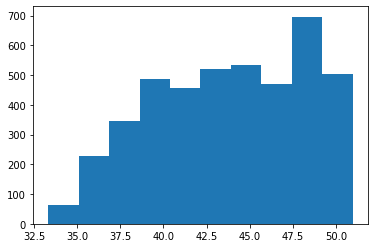

In [13]:
import matplotlib.pyplot as plt

plt.hist(new_df['Time'])

In [19]:
new_df.iloc[1000:,:]

,Time,UE,App
1000,39.970726,1,web-rtc
1001,39.971224,2,sipp
1002,39.971245,2,sipp
1003,39.971513,2,sipp
1004,39.972006,3,web-server
...,...,...,...
4299,50.932083,1,web-rtc
4300,50.933567,1,web-rtc
4301,50.979146,1,web-rtc
4302,50.979177,1,web-rtc


In [105]:
def window_crop(new_df, offset = 1000, duration=1):
    all_windows = []
    web_rtc = []
    sipp = []
    web_server = []
    
    
    time_start = -1 
    for i, row in new_df.iloc[offset:,:].iterrows():

        if time_start == -1:
            time_start = row['Time']
            index_start = i

        time_end = row['Time']

        # check elapsed time
        if time_end - time_start > duration:
            time_start = -1
            index_end = i

            # crop window
            window = new_df.iloc[index_start:index_end+1,:]

            count_values = dict(window['App'].value_counts())
            
            if 'web-rtc' in count_values.keys():
                web_rtc.append(count_values['web-rtc'])
                #web_rtc.append(1)
                
            else:
                web_rtc.append(0)
               
            if 'sipp' in count_values.keys():
                sipp.append(count_values['sipp'])
                #sipp.append(1)
            else:
                sipp.append(0)
            if 'web-server' in count_values.keys():
                web_server.append(count_values['web-server'])
                #web_server.append(1)
            else:
                web_server.append(0)
            
    return web_rtc, sipp, web_server

In [112]:
web_rtc, sipp, web_server = window_crop(new_df, offset = 0, duration=1)

In [113]:
web_rtc

[16,
 45,
 63,
 102,
 185,
 193,
 223,
 210,
 198,
 243,
 295,
 246,
 250,
 222,
 331,
 335,
 333]

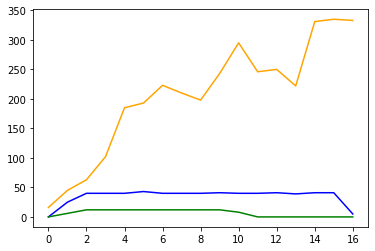

In [114]:
plt.plot(web_rtc,color='orange')
plt.plot(sipp, color ='blue')
plt.plot(web_server, color='green')

In [146]:
def window_crop_new(new_df, offset = 1000, next_start_duration=0.2,window_duration=1):
    all_windows = []
    web_rtc = []
    sipp = []
    web_server = []
    
    
    time_start = -1 
    for i, row in new_df.iloc[offset:,:].iterrows():

        if time_start == -1:
            time_start = row['Time']
            index_start = i
            
            # find window 1
            web_rtc_temp, sipp_temp, web_server_temp = find_window(new_df, index_start, window_duration=window_duration)
            if web_rtc_temp!=-1:
                web_rtc.append(web_rtc_temp)
                sipp.append(sipp_temp)
                web_server.append(web_server_temp)
            
        time_end = row['Time']

        # check elapsed time
        if time_end - time_start > next_start_duration:
            index_start = i
            time_start = -1
            
            # find window 2
            web_rtc_temp, sipp_temp, web_server_temp = find_window(new_df, index_start, window_duration=window_duration)
            if web_rtc_temp!=-1:
                web_rtc.append(web_rtc_temp)
                sipp.append(sipp_temp)
                web_server.append(web_server_temp)
            
    return web_rtc, sipp, web_server

In [147]:
def find_window(df, index_start, window_duration=1):
    web_rtc=-1 
    sipp=-1
    web_server=-1
    for i, row in df.iloc[index_start:,:].iterrows():
        if i == index_start:
            time_start = row['Time']
            
        time_end = row['Time']
        
        # check elapsed time
        if time_end - time_start > window_duration:
            index_end = i
            
            # crop window
            window = new_df.iloc[index_start:index_end+1,:]

            count_values = dict(window['App'].value_counts())
            
            if 'web-rtc' in count_values.keys():
                web_rtc = count_values['web-rtc']
                #web_rtc.append(1)
                
            else:
                web_rtc = 0
               
            if 'sipp' in count_values.keys():
                sipp = count_values['sipp']
                #sipp.append(1)
            else:
                sipp = 0
            if 'web-server' in count_values.keys():
                web_server = count_values['web-server'] 
                #web_server.append(1)
            else:
                web_server = 0
            break

    return web_rtc, sipp, web_server

In [162]:
web_rtc, sipp, web_server = window_crop_new(new_df, offset = 1000, next_start_duration=0.1, window_duration=0.3)

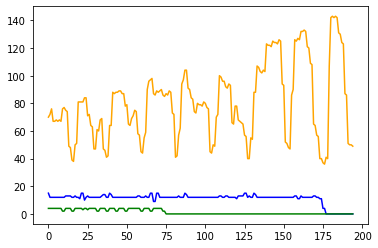

In [163]:
plt.plot(web_rtc,color='orange')
plt.plot(sipp, color ='blue')
plt.plot(web_server, color='green')

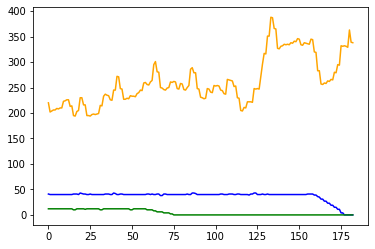

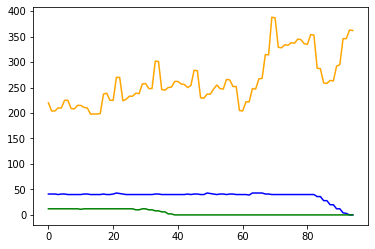

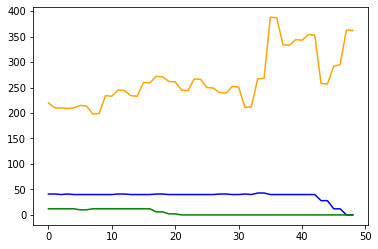

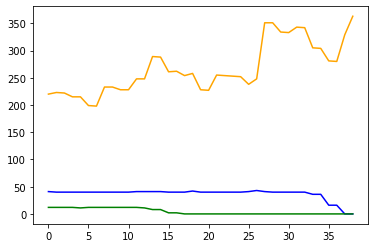

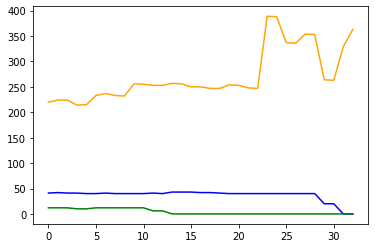

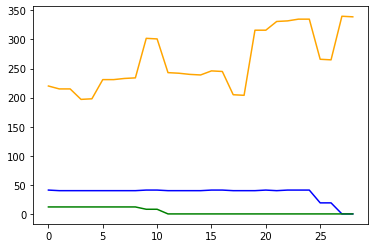

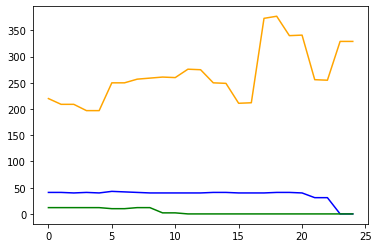

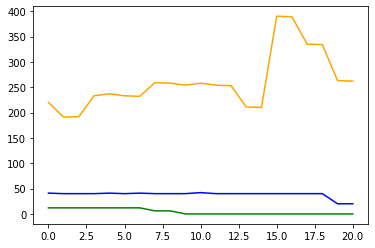

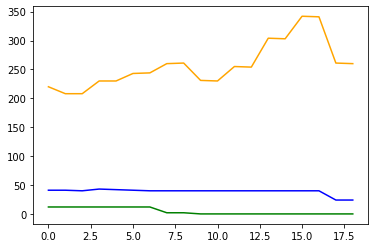

In [167]:
next_starts = [0.1,0.2,0.4,0.5,0.6,0.7,0.8,0.9,1]
win_durations = [1]
for next_s in next_starts:
    for win_d in win_durations:
        web_rtc, sipp, web_server = window_crop_new(new_df, offset = 1000, next_start_duration=next_s, window_duration=win_d)

        plt.figure()
        plt.plot(web_rtc,color='orange')
        plt.plot(sipp, color ='blue')
        plt.plot(web_server, color='green')
        plt.show()